In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
import pandas as pd

In [2]:
with open ("../../../database/credit_db.pkl", mode='rb') as f:
    credit_db = pickle.load(f)

In [3]:
credit_db.shape

(30000, 11)

METHOD A

In [4]:
credit_sample = pd.DataFrame(credit_db)

In [5]:
credit_sample = credit_sample.sample(n=20000, random_state = 28)

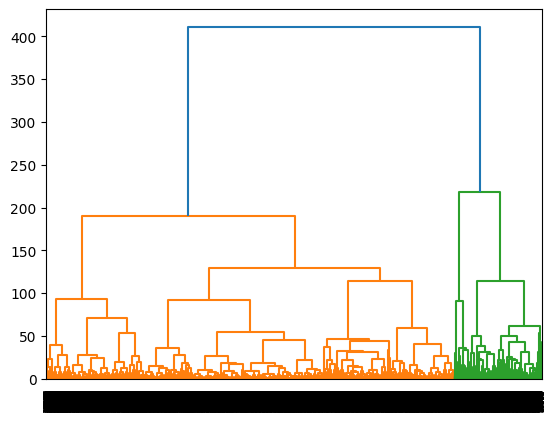

In [6]:
dnd = dendrogram(linkage(credit_sample, method='ward'))

In [7]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hc.fit_predict(credit_sample)

In [8]:
s_score = silhouette_score(credit_sample, labels)
s_score

np.float64(0.4901162190390085)

METHOD B

In [11]:
database = pd.read_csv('../../../database/credit_db.csv',header = 1)

In [12]:
db_scaled = database
scaler_credit = StandardScaler()
db_scaled = scaler_credit.fit_transform(db_scaled)

In [13]:
database

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
db_scaled

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.31413612,
        -0.29338206,  1.87637834],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.31413612,
        -0.18087821,  1.87637834],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24868274,
        -0.01212243, -0.53294156],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.18322937,
        -0.11900109,  1.87637834],
       [ 1.7318776 , -0.67427636, -1.23432296, ...,  3.15253642,
        -0.19190359,  1.87637834],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24868274,
        -0.23713013,  1.87637834]], shape=(30000, 25))

In [15]:
db_scaled = pd.DataFrame(db_scaled)

In [16]:
db_scaled = db_scaled.sample(n = 20000, random_state=28)

In [17]:
pca_s_score = []
pca_comps = [2,6,10,14]

for i in pca_comps:
    pca_ = PCA(n_components=i, random_state= 28)
    pca_db_scaled = pca_.fit_transform(db_scaled)
    hc_ = AgglomerativeClustering(n_clusters= 2, metric= 'euclidean', linkage= 'ward')
    labels_ = hc_.fit_predict(pca_db_scaled)
    pca_s_score.append({
        'components':i,
        'silhouette_score':silhouette_score(pca_db_scaled,labels_)
    })

In [18]:
pca_s_score

[{'components': 2, 'silhouette_score': np.float64(0.4458267569659017)},
 {'components': 6, 'silhouette_score': np.float64(0.29209973091970487)},
 {'components': 10, 'silhouette_score': np.float64(0.2565825614329279)},
 {'components': 14, 'silhouette_score': np.float64(0.1186649822228414)}]